<a href="https://colab.research.google.com/github/9Pawel3/python-data-science/blob/main/Pandas_numerous_datasets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Random dataframe**

In [ ]:
import pandas as pd

dict1 ={'Name':['Priyang','Aadhya','Krisha','Vedant','Parshv',
                'Mittal','Archana'],
                'Marks':[98,89,99,87,90,83,99],
                'Gender':['Male','Female','Female','Male','Male',
                         'Female','Female']
               }
df1=pd.DataFrame(dict1)
df1

,Name,Marks,Gender
0,Priyang,98,Male
1,Aadhya,89,Female
2,Krisha,99,Female
3,Vedant,87,Male
4,Parshv,90,Male
5,Mittal,83,Female
6,Archana,99,Female


In [ ]:
# 1. Display top 3 rows of dataset

df1.head(3)

,Name,Marks,Gender
0,Priyang,98,Male
1,Aadhya,89,Female
2,Krisha,99,Female


In [ ]:
# 2. Display last 3 rows of dataset
df1.tail(3)

,Name,Marks,Gender
4,Parshv,90,Male
5,Mittal,83,Female
6,Archana,99,Female


In [ ]:
# 3. Find shape of our dataset (number of rows and columns)

df1.shape

print('Number of rows', df1.shape[0])
print('Number of columns', df1.shape[1])

(7, 3)

In [ ]:
# 4. Info about dataset like total rows, total columns, datatypes of each column and memory requirement
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    7 non-null      object
 1   Marks   7 non-null      int64 
 2   Gender  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [ ]:
# 5. Check null values in dataset
df1.isnull()
df1.isnull().sum() # will display number of nulls by column
df1.isnull().sum(axis=1) # will display number of nulls by rows

,Name,Marks,Gender
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False


In [ ]:
# 6. Get overall statistics about the dataframe
df1.describe() # just numerical column
df1.describe(include='all') # all categorical and numerical

,Name,Marks,Gender
count,7,7.000000,7
unique,7,NaN,2
top,Priyang,NaN,Female
freq,1,NaN,4
mean,NaN,92.142857,NaN
std,NaN,6.491753,NaN
min,NaN,83.000000,NaN
25%,NaN,88.000000,NaN
50%,NaN,90.000000,NaN
75%,NaN,98.500000,NaN


In [ ]:
# 7. Find unique values from the gender column
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# 8. Display number of unique values from gender column
df1['Gender'].nunique()

2

In [ ]:
# 9. Display count of unique values in gender column
df1['Gender'].value_counts()

In [ ]:
# 10. Find total number of students having marks between 90 to 100 (inclusive) using between method
df1['Marks'] >= 90 # will return booleans
df1[df1['Marks'] >= 90] # returns df with rows meeting the criteria

df1[(df1['Marks'] >= 90) & (df1['Marks'] <= 100)]
len(df1[(df1['Marks'] >= 90) & (df1['Marks'] <= 100)]) # output is 4 students so we have the count

df1['Marks'].between(90,100) # inclusive 90 and 100

0     True
1    False
2     True
3    False
4     True
5    False
6     True
Name: Marks, dtype: bool

In [ ]:
sum(df1['Marks'].between(90,100)) # inclusive 90 and 100

4

In [ ]:
# 11. Find average of marks
df1['Marks'].mean()

92.14285714285714

In [ ]:
# 12. Apply method on marks
def marks(x):
  return x/2

df1['Half_marks'] = df1['Marks'].apply(marks)
df1

df1['Half_marks'] = df1['Marks'].apply(lambda x: x/2)

df1['Name'].apply(len) # returns number of strings

,Name,Marks,Gender,Half_marks
0,Priyang,98,Male,49.0
1,Aadhya,89,Female,44.5
2,Krisha,99,Female,49.5
3,Vedant,87,Male,43.5
4,Parshv,90,Male,45.0
5,Mittal,83,Female,41.5
6,Archana,99,Female,49.5


In [ ]:
# 13. Map function - encoding male to 0 and female 1
df1['Male_Female'] = df1['Gender'].map({'Male' : 1, 'Female' :0})


In [ ]:
# 14. Drop the column(s)

df1.drop('Male_Female', axis=1)
df1.drop(columns=['Male_Female','Half_marks'], axis=1, inplace=True) # need to provide list of columns naming

In [ ]:
# 15. Print name of the columns
df1.columns # returns column list
df1.index # returns indexes

In [ ]:
# 16. Sort DF as per the marks column
df1.sort_values(by='Marks', ascending=False) # descending
df1.sort_values(by=['Marks', 'Gender'], ascending=False) # descending

In [ ]:
# 17. Display marks of female only
df1['Gender'] == 'Female' # booleans
df1[df1['Gender'] == 'Female'][['Name','Marks']] # returns female data for columns name and marks only

df1['Gender'].isin(['Female'])
df1[df1['Gender'].isin(['Female'])][['Name','Marks']] # returns exactly the same

0    False
1     True
2     True
3    False
4    False
5     True
6     True
Name: Gender, dtype: bool

**2. Eccomerce purchases - Kaggle**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Ecommerce Purchases')

data

In [ ]:
# 1. Display top and last 10 rows of dataset

data.head(10)
data.tail(10)

In [ ]:
# 2. Check datatype of each column
data.info()

In [ ]:
# 3. Check datatype for null values
data.isnull().sum()

In [ ]:
# 4. How many rows and columns are in dataset?
len(data.columns) # as it is python list
len(data) # returns rows
data.info() # more thorough info about df


In [ ]:
# 5. Highest and lowest and average purchase prices
data['Purchase Price'].min()
data['Purchase Price'].max()
data['Purchase Price'].mean()

In [ ]:
# 6. How many people have french as their language
len(data[data['Language'] == 'fr']) # or
data[data['Language'] == 'fr'].count()

In [ ]:
# 7. Job title contains engineer
data[data['Job'].str.contains('engineer', case=False)] # or
len(data[data['Job'].str.contains('engineer', case=False)])

In [ ]:
# 8. Find email of the person with the following IP address: 132.207.160.22
data['IP Address'] == '132.207.160.22'
data[data['IP Address'] == '132.207.160.22']['Email'] # will display only email column

In [ ]:
# 9. How many people have Mastercard as their credit card provider and made a purchase over 50
(data['CC Provider'] == 'Mastercard') & (data['Purchase Price'] > 50)
data[(data['CC Provider'] == 'Mastercard') & (data['Purchase Price'] > 50)] # returns df with rows meeting requirements


len(data[(data['CC Provider'] == 'Mastercard') \
& (data['Purchase Price'] > 50)]) # or
data[(data['CC Provider'] == 'Mastercard') & (data['Purchase Price'] > 50)].count() # both show count of rows


In [ ]:
# 10. Find email of the person with the following credic card number 4664825258997302
data[data['Credit Card'] == 4664825258997302]['Email'] # will display persons email address

In [ ]:
# 11. How many purchase during the AM and PM?
data['AM or PM'].value_counts()

In [ ]:
# 12. How many people have a credit card expiring in 2020?
data[data['CC Exp Date'].apply(lambda x: x[3:] =='20')].count() # or len

In [ ]:
# 13. Top 5 most popular email providers
list1=[]

for email in data['Email']:
  list1.append(email.split('@')[1])

data['Provider'] = list1
data['Provider'].value_counts().head(5)

data['Email'].apply(lambda x: x.split('@')[1].value_counts().head(5)) # returns the same

**3. San Francisco salaries - Kaggle**

In [ ]:
import pandas as pd
path = '/content/Salaries.csv'

DF = pd.read_csv(path)

DF

<ipython-input-35-4c1cc4de9516>:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv(path)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [ ]:
# 1. Check df info and nulls
DF.info
DF.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [ ]:
# 2. Drop ID, Notes, Agency and Status columsn
DF.drop(['Id','Notes','Agency', 'Status'], axis=1, inplace=True) # 0 is for rows
DF

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148649,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014


In [ ]:
# 3. Find occurence of the empployee (top 5)
DF['EmployeeName'].value_counts().head(5)

Kevin Lee                   0.000087
Richard Lee                 0.000074
Steven Lee                  0.000074
William Wong                0.000074
Stanley Lee                 0.000061
                              ...   
Jeffrey Skover              0.000007
Ken Dever                   0.000007
Kevin Whitfield             0.000007
Granville McCollough III    0.000007
Joe Lopez                   0.000007
Name: EmployeeName, Length: 110811, dtype: float64

In [ ]:
# 4. Find number of unique job titles
DF['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [ ]:
# 5. Total number of job titles that containt Captain
len(DF[DF['JobTitle'].str.contains('CAPTAIN', case=False)])

141

In [ ]:
# 6. Display all employee names from fire department
DF[DF['JobTitle'].str.contains('fire', case=False)]['EmployeeName']

4            PATRICK GARDNER
6                  ALSON LEE
8             MICHAEL MORRIS
9         JOANNE HAYES-WHITE
10             ARTHUR KENNEY
                 ...        
145956      Kenneth C Farris
147556         Edward A Dunn
148021        Kari A Johnson
148209          Sheryl K Lee
148554       Lawrence F Gatt
Name: EmployeeName, Length: 5879, dtype: object

In [ ]:
# 7. Find min, max and average basepay
DF['BasePay'].describe() # or
DF['BasePay'].agg(['min', 'max', 'mean'])



ValueError: ignored

In [ ]:
# 8. Replace not provided value in employeename to np.nan
import numpy as np
DF['EmployeeName'] = DF['EmployeeName'].replace({'Not provided' : np.nan})

0            NATHANIEL FORD
1              GARY JIMENEZ
2            ALBERT PARDINI
3         CHRISTOPHER CHONG
4           PATRICK GARDNER
                ...        
148649        Roy I Tillery
148650                  NaN
148651                  NaN
148652                  NaN
148653            Joe Lopez
Name: EmployeeName, Length: 148654, dtype: object

In [ ]:
# 8. Drow rows with more than 5 missing values
DF.info()

DF.isnull().sum(axis=1)

DF.drop(
    DF[DF.isnull().sum(axis=1) \
       == 5].index, axis=0, inplace=True
)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148049 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          112495 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 10.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  objec

In [ ]:
# 9. Find job title of ALBERT PARDINI
DF[DF['JobTitle'] == 'ALBERT PARDINI']['JobTitle']

Series([], Name: JobTitle, dtype: object)

In [ ]:
# 10. How much does Albert Pardini make (including benefits)?
DF[DF['EmployeeName'] == 'ALBERT PARDINI']['TotalPayBenefits']

2    335279.91
Name: TotalPayBenefits, dtype: float64

In [ ]:
# 11. Display the name of the person having the highest basepay
DF['BasePay'] = pd.to_numeric(DF['BasePay'], errors='coerce')

DF[DF['BasePay'].max() == DF['BasePay']]['EmployeeName']

72925    Gregory P Suhr
Name: EmployeeName, dtype: object

In [ ]:
# 12. Find average basepay for all employee per year
DF['BasePay'] = pd.to_numeric(DF['BasePay'], errors='coerce')

DF.groupby('Year').mean()['BasePay']

<ipython-input-79-72e96dd806de>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DF.groupby('Year').mean()['BasePay']


Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [ ]:
# 13. Average basepay per jobtitle
DF['BasePay'] = pd.to_numeric(DF['BasePay'], errors='coerce')
DF.groupby('JobTitle')['BasePay'].mean()


JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2159, dtype: float64

In [ ]:
# 14. Find average basepay for employees of accountant
DF[DF['JobTitle'] == 'Accountant']['BasePay'].mean()

nan

In [ ]:
# 15. Top 5 most common jobs
DF['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**3. Adult income - Kaggle**

In [ ]:
import pandas as pd

pathh = '/content/adult.csv'

adul = pd.read_csv(pathh)

In [ ]:
# 1. Fetchd random data from df (50%)
adul.info()
len(adul.sample(frac=0.50, random_state=100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


24421

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

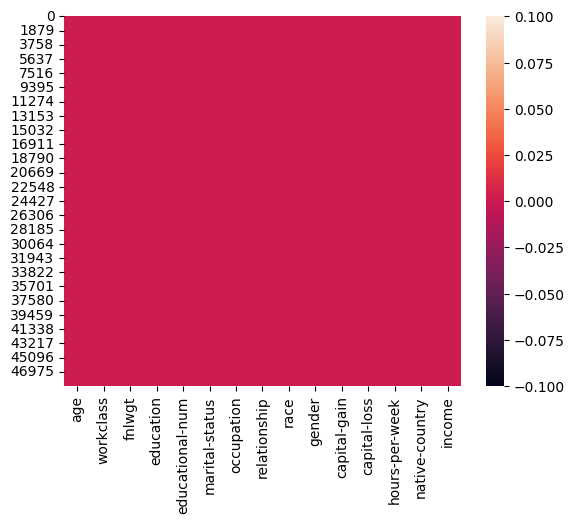

In [ ]:
# 2. Replace '?' with nan
import numpy as np
adul.replace('?', np.nan)

# smart way to check on missing values
import seaborn as sns
sns.heatmap(adul.isnull())

adul.isin(['?']).sum()

In [ ]:
# 3. Drop missing values
perc_missing = adul.isnull().sum()*100/len(adul)
perc_missing

# if there were any missing values
data.dtopna(how='any', inplace=True)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [ ]:
# 4. Check for duplicated data and drop it
dup = adul.duplicated().any()

adul = adul.drop_duplicates()
adul.shape

AttributeError: ignored

In [ ]:
# 5. Drop the columns: education-num, capital-gain and capital-loss
adul = adul.drop(columns=['capital-gain', 'capital-loss', 'education-num'])


AttributeError: ignored

In [ ]:
# 6. What is the distribution of age column
adul['age'].hist()

TypeError: ignored

In [ ]:
# 7. Find number of people aged between 17 and 48
filtered_adul = adul[adul['age'].between(17, 48)] # or
sum(filter_age = (adul['age'] >= 17) & (adul['age'] <=48)) # or

sum(adul['age'].between(17, 48))


TypeError: ignored

In [ ]:
# 8. How many people have bachelors or masters degree?
edu_filt = adul[(adul['education'] == 'Bachelors') | (adul['education'] == 'Masters')] # or

filt1 = (adul['education'] == 'Bachelors')
filt2 = (adul['education'] == 'Masters')

len(adul[filt1 | filt2]) # or

sum(adul['education'].isin(['Bachelors', 'Masters']))

TypeError: ignored

In [ ]:
# 9. Replace values <=50k and >50k with 0 and 1
adul['salary'].unique()
adul['salary'] = adul['salary'].replace()

def salary_enumeration(sal):
  if sal == '<=50K':
    return 0
  else:
    return 1

adul['encoded_salary'] = adul['salary'].apply(salary_enumeration)

TypeError: ignored

In [ ]:
# 10. Which workclass gets the highest salary?
adul.groupby('workclass')['salary'].mean().sort_values(ascending=False)

In [ ]:
# 11. Who gets better change to get >50k salary - male or female?
adul.groupby('sex')['salary'],mean().sort_values(ascending=False)

In [ ]:
# 12. Switch workclass column datatype to categorical datatype
adul['workclass'].astype('category')

AttributeError: ignored

**4. Titanic train set - Kaggle**

In [ ]:
import pandas as pd

paths = '/content/titanic_train.csv'

Df = pd.read_csv(paths)

In [ ]:
# 1. Review statistics of all columns
Df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# 2. Count number of male passengers and check info about these
sum(Df['Sex'] == 'male')
Df[Df['Sex'] == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

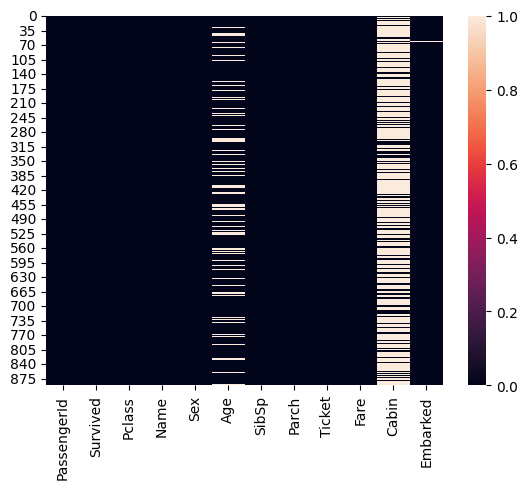

In [ ]:
# 3. Check if null values are available
Df.isnull().sum()

import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(Df.isnull())

In [ ]:
# 4. Count percentage of null data
per_missing = Df.isnull().sum() * 100 / len(Df)

In [ ]:
# 5. Drop column
Df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# 6. Handle missing values
Df['Embarked'].mode() # the most frequent values
Df['Embarked'].fillna('S', inplace=True)

Df['Age'].fillna(Df['Age'].mean(), inplace=True)

Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# 7. Encode categorical data - Sex and Embarked
Df['Sex'].unique()
Df['gender_encoded'] = Df['Age'].map({'male' : 1, 'female' : 0})

pd.get_dummies(Df, columns = ['Embarked'], drop_first=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,gender_encoded,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,NaN,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,NaN,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,NaN,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,NaN,0,0


In [ ]:
# 8. How many people survived and died?
Df['Survived'].value_counts()



0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# 9. How many passengers were in 1st, 2nd and 3rd classes?
Df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

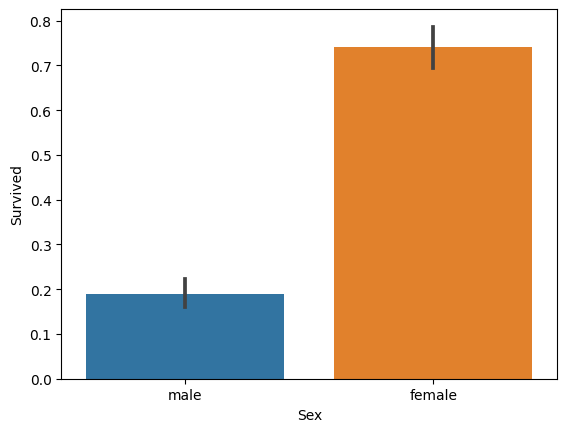

In [ ]:
# 10. Who has better change of survival based on sex?
sns.barplot(x='Sex', y='Survived', data=Df)

In [ ]:
# 11. Calculate fare per family
Df['Fare_per_family'] = Df['Fare'] / Df['SibSp']
Df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_encoded,Fare_per_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,NaN,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,NaN,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,NaN,inf
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,NaN,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,NaN,inf
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,NaN,inf
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,NaN,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,NaN,inf


**5. Google play store review**

In [ ]:
x = '/content/googleplaystore.csv'

dF = pd.read_csv(x)
dF

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# 1. Number of app titles containing Astrology
len(dF[dF['App'].str.contains('Astrology', case = False)].value_counts())

3

In [ ]:
# 2. Find average app rating
dF['Rating'].mean()

4.193338315362443

In [ ]:
# 3. Check total number of unique category
dF['Category'].nunique()

34

In [ ]:
# 4. Which category has the highest rating?
dF.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

In [ ]:
# 5. Find number of apps with rating = 5.0
len(dF[dF['Rating'] == 5.0])

274

In [ ]:
# 6. Calculate average value of reviews

dF[dF['Reviews'] == '3.0M']

dF['Reviews'] = dF['Reviews'].replace('3.0M', 3.0)

dF['Reviews'].astype('float').mean()

444111.9265750392

In [ ]:
# 7. Check number of free and paid apps
dF['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [ ]:
# 8. Top 5 apps with most reviews
dF['Reviews'].astype('int').sort_values(ascending=False).head()


2544    78158306
3943    78128208
381     69119316
336     69119316
3904    69109672
Name: Reviews, dtype: int64

In [ ]:
# 9. Average rating of free and paid apps
dF.groupby('Type')['Rating'].mean()

Type
0       19.000000
Free     4.186203
Paid     4.266615
Name: Rating, dtype: float64

In [ ]:
# 10. Find app with most installs
dF['Installs'].dtype
dF['installs_1'] = dF['Installs'].str.replace(',', ' ')
dF['installs_1'] = dF['Installs'].str.replace('+', ' ')
dF['installs_1'].str.replace('Free', '0')
dF['installs_1'] = dF['installs_1'].astype('int')

dF.groupby('installs_1')['App'].sort_values(ascending=False)

<ipython-input-76-368725771a2d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dF['installs_1'] = dF['Installs'].str.replace('+', ' ')


ValueError: ignored